# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## **Background**
Vivendo is a fast food chain in Brazil with over 200 outlets. Customers often claim compensation from the company for food poisoning. The legal team processes these claims. The legal team has offices in four locations. 

- The legal team wants to improve how long it takes to reply to customers and close claims. 
- The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1



*Data Validation*

The DATA contains 2000 rows, and 8 columns.

* **claim_id** = There were 2000 unique claim, as expected.
* **time_to_close** = No missing values in this column and the range of the days to close a claim is between 76 and 518 days
* **claim_amount** = Currency of Brazil, remove the 'R$' symbol and convert the 'claim_amount' column from a string to a float data type in Python, while keeping the two decimal places intact. No missing values.
* **amount_paid** = 36 missing values, replaced with the overall median amount paid.
* **location** = no missing values, there were 4 categories, as expected.
* **individuals_on_claim** = no missing values, number of individuals on a claim between 1 and 15
* **linked_cases** = 26 missing values, replaced with 'FALSE', so they are 2 linked_cases - TRUE/FALSE
* **cause** = converted all (3) categories to lower, replace vegetable(s) into vegetable and remove all spaces, no missing values

In [91]:
food = pd.read_csv('food_claims_2212.csv')
food

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [92]:
food.shape

(2000, 8)

In [93]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [94]:
print(f"Duplicated identifier of the claim: {food['claim_id'].duplicated().sum()}")

Duplicated identifier of the claim: 0


In [95]:
print(f"Missing values in column 'time_to_close' a claim: {food['time_to_close'].isna().sum()}")

Missing values in column 'time_to_close' a claim: 0


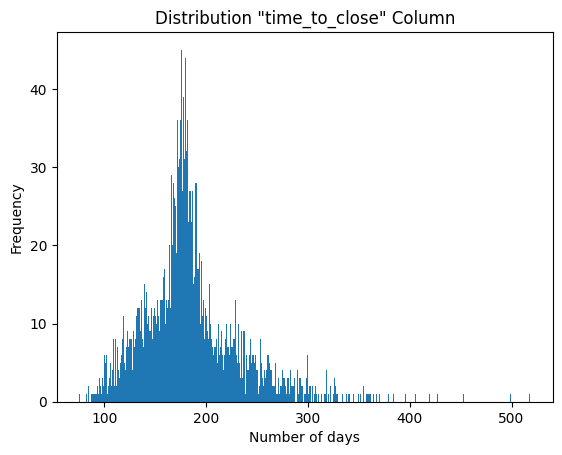

76
518
179.0


In [96]:
# distribution of the days to close a claim
# data
data = food['time_to_close']

# Plotting the histogram
plt.hist(data, bins=range(min(data), max(data)+2), align='left')

# labels and title
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.title('Distribution "time_to_close" Column')
plt.show()
print(data.min())
print(data.max())
print(data.median())

In [97]:
# remove 'R$' symbol and convert the 'claim_amount' column from a string to a float 
food['claim_amount'] = food['claim_amount'].str.strip('R$')
food['claim_amount'] = food['claim_amount'].astype('float')
assert food['claim_amount'].dtype == 'float'

In [98]:
# missing values column 'claim_amount'
food['claim_amount'].isna().sum()

0

In [99]:
# missing values column 'amount_paid'
food['amount_paid'].isna().sum()
# Replace missing values (36) with the overall median 'amount_paid'
overall_median = food['amount_paid'].median()
food['amount_paid'].fillna(overall_median, inplace=True)

In [100]:
# missing values 'location'
food['location'].isna().sum()
# count location for every column
food.groupby('location').count()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim,linked_cases,cause
location,,,,,,,
FORTALEZA,311,311,311,311,311,311,311
NATAL,287,287,287,287,287,283,287
RECIFE,885,885,885,885,885,872,885
SAO LUIS,517,517,517,517,517,508,517


In [101]:
# missing values 'individuals_on_claim'
food['individuals_on_claim'].isna().sum()

0

1
15
8.0


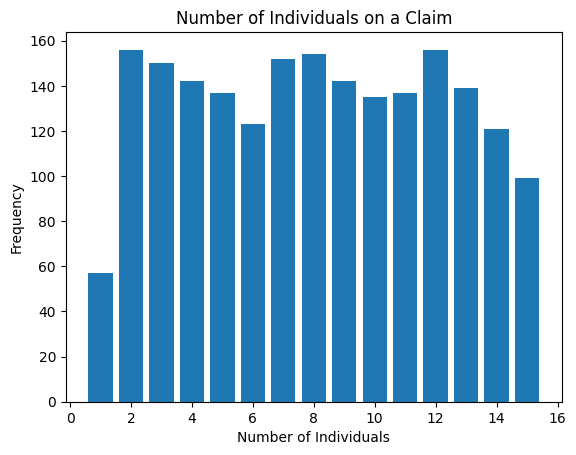

In [102]:
# distribution of individuals in a claim
num = food['individuals_on_claim']

# Counting the frequency of each value
counts = num.value_counts()

# Sorting the counts by index
counts = counts.sort_index()

# Plotting the bar chart
plt.bar(counts.index, counts.values)
plt.xlabel('Number of Individuals')
plt.ylabel('Frequency')
plt.title('Number of Individuals on a Claim')

print(num.min())
print(num.max())
print(num.median())

In [103]:
# missing values 'linked_cases'
food['linked_cases'].isna().sum()
# Replace missing values (26) with FALSE 
food['linked_cases'].fillna(False, inplace=True)
food.groupby('linked_cases').count()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,cause
linked_cases,,,,,,,
False,1519,1519,1519,1519,1519,1519,1519
True,481,481,481,481,481,481,481


In [104]:
# missing values 'cause'
food['cause'].isna().sum()
# convert all categories to lower, replace vegetables into vegetable and remove all spaces
food['cause'] = food['cause'].str.lower().replace('vegetables', 'vegetable').str.strip()
food['cause'].value_counts()


meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

## Task 2

*Conclusion*

"RECIFE" has the highest number of claims, followed by "SAO LUIS", "FORTALEZA", and "NATAL". There is a significant difference in counts across categories, the observations may be unbalanced, indicates that the distribution of claims is not evenly distributed across all locations.

2. Create a visualization that shows the number of claims in each location. Use the visualization to: 
a. State which category of the variable location has the most observations 
b. Explain whether the observations are balanced across categories of the variable location

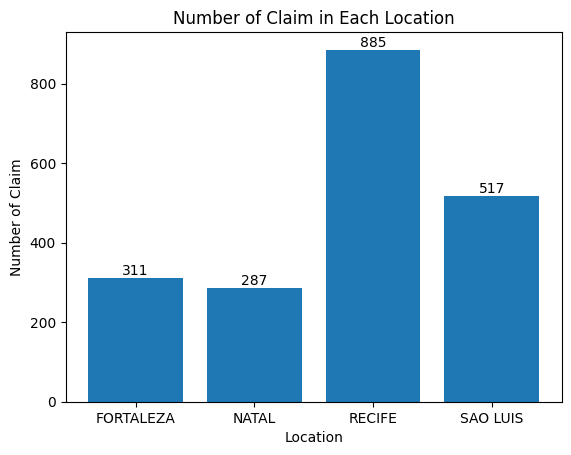

In [105]:
# Group the data by location and count the number of claims
claim_by_location = food.groupby('location')['claim_id'].count()

# Create a bar plot
plt.bar(claim_by_location.index, claim_by_location.values)
plt.xlabel('Location')
plt.ylabel('Number of Claim')
plt.title('Number of Claim in Each Location')
# Add the number values to the bars
for i, v in enumerate(claim_by_location.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Task 3

*Conclusion*

The median days is located at 179 days. This means that 50% of the claims take less than 179 days to close, while the other 50% take longer. The minimum value is 76 days, indicating the shortest time it takes to close a claim. The maximum value is 518 days, representing the longest time it takes to close a claim. By considering the positioning of the median and observing the range of values, we can infer that the distribution of time to close claims is slightly right-skewed, with a concentration of values towards longer durations.

3. Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

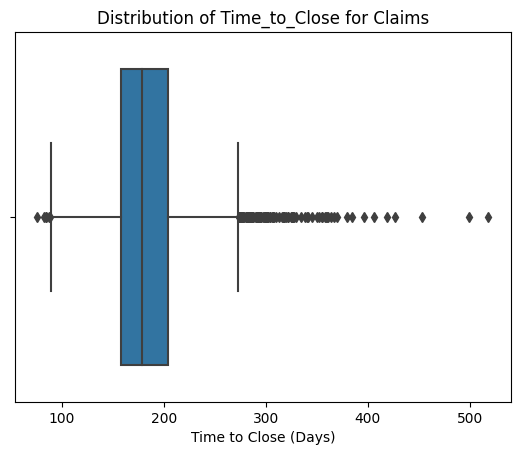

179.0 76 518


In [106]:
# Calculate the statistics
median = food['time_to_close'].median()
minimum = food['time_to_close'].min()
maximum = food['time_to_close'].max()

# Creating a box plot of time to close
sns.boxplot(x=food['time_to_close'])

# Adding labels and title to the plot
plt.xlabel('Time to Close (Days)')
plt.title('Distribution of Time_to_Close for Claims')

# Displaying the plot
plt.show()
print(median, minimum, maximum)

## Task 4

*Conclusion*

There is a relatively similar median time to close across the different locations. The median values for FORTALEZA, NATAL, and SAO LUIS are all around 179-180 days, while RECIFE has a slightly lower median of 178.0 days. However, there is variation in the maximum and minimum time to close, indicating that some claims in each location take longer or shorter periods to be closed.

4. Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

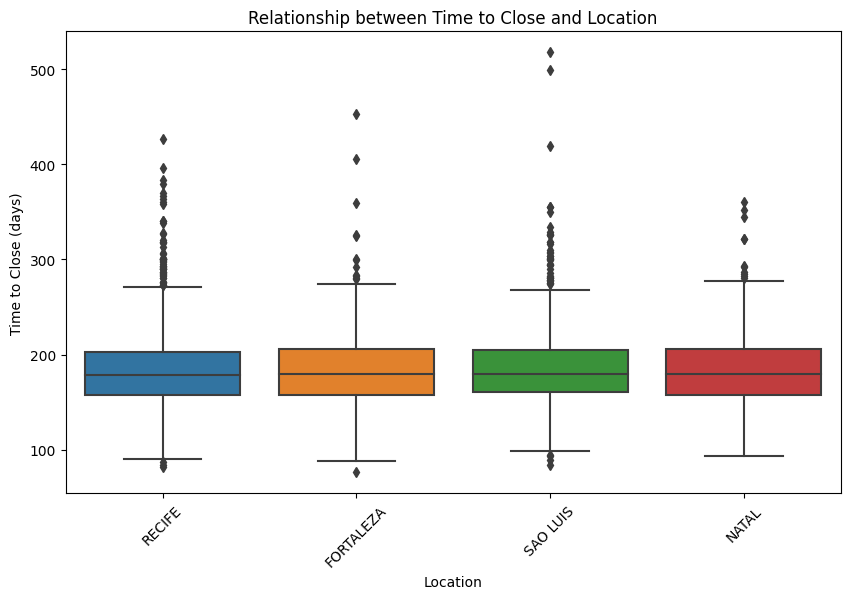

Median for each: location
FORTALEZA    180.0
NATAL        179.0
RECIFE       178.0
SAO LUIS     179.0
Name: time_to_close, dtype: float64
Maximum for each: location
FORTALEZA    453
NATAL        361
RECIFE       427
SAO LUIS     518
Name: time_to_close, dtype: int64
Minimum for each: location
FORTALEZA    76
NATAL        93
RECIFE       82
SAO LUIS     84
Name: time_to_close, dtype: int64


In [107]:
food.groupby('location')['time_to_close'].median()
food.groupby('location')['time_to_close'].max()
food.groupby('location')['time_to_close'].min()
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=food['location'], y=food['time_to_close'])

# Set the labels and title
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.title('Relationship between Time to Close and Location')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
print(f"Median for each: {food.groupby('location')['time_to_close'].median()}")
print(f"Maximum for each: {food.groupby('location')['time_to_close'].max()}")
print(f"Minimum for each: {food.groupby('location')['time_to_close'].min()}")

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam